In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def acquire_stud_grades():
    if os.path.exists('student_grades.csv'):
        return pd.read_csv('student_grades.csv')
    else:
        print('no beuno')
        return None
os.path.exists('student_grades.csv')


True

In [5]:
df = acquire_stud_grades()

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        103 non-null    float64
 4   final_grade  104 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 4.2 KB


In [9]:
df.isnull().sum()

student_id     0
exam1          1
exam2          0
exam3          1
final_grade    0
dtype: int64

In [10]:
df.shape

(104, 5)

In [11]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95.0,96
1,2,98.0,93,96.0,95
2,3,85.0,83,87.0,87
3,4,83.0,80,86.0,85
4,5,93.0,90,96.0,97


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
student_id,104.0,52.500000,30.166206,1.0,26.75,52.5,78.25,104.0
exam1,103.0,78.398058,14.339948,57.0,70.00,79.0,92.00,100.0
exam2,104.0,77.307692,10.295703,65.0,70.00,75.0,89.00,93.0
exam3,103.0,84.242718,8.709321,70.0,78.00,85.0,94.00,96.0
final_grade,104.0,81.692308,10.918122,65.0,72.00,81.0,93.00,97.0


In [14]:
df = df.drop(columns='student_id')

In [15]:
df.index = [i + 1 for i in df.index.to_list()]

In [16]:
df.head()

,exam1,exam2,exam3,final_grade
1,100.0,90,95.0,96
2,98.0,93,96.0,95
3,85.0,83,87.0,87
4,83.0,80,86.0,85
5,93.0,90,96.0,97


In [17]:
df.isna().sum()

exam1          1
exam2          0
exam3          1
final_grade    0
dtype: int64

In [21]:
df['exam1'].isna() == True

1      False
2      False
3      False
4      False
5      False
       ...  
100    False
101    False
102    False
103    False
104    False
Name: exam1, Length: 104, dtype: bool

In [22]:
df.dropna().shape

(102, 4)

In [23]:
df = df.dropna()

In [26]:
100.0 == 100

True

In [29]:
(df['exam1'].astype(int) == df['exam1']).value_counts()

True    102
Name: exam1, dtype: int64

In [30]:
(df['exam3'].astype(int) == df['exam3']).value_counts()

True    102
Name: exam3, dtype: int64

In [32]:
df['exam1'] = df.exam1.astype(int)
df['exam3'] = df.exam3.astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 1 to 104
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   exam1        102 non-null    int64
 1   exam2        102 non-null    int64
 2   exam3        102 non-null    int64
 3   final_grade  102 non-null    int64
dtypes: int64(4)
memory usage: 4.0 KB


In [34]:
def clean_stud_grades(df):
    '''
    clean_stud_grades will take in df and will remove student_id, rows with NULL values in exam 1 or 3 and will
    cast floats into int (exam 1 and 3).
    
    args: df
    return: df (clean)
    
    '''
    df = df.drop(columns='student_id')
    df = df.dropna()
    df = df.astype(int)
    return df

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
def split_stud_grades(df):
    train_val,test = train_test_split(df,
                                     random_state=1349,
                                     train_size=0.7)
    train, validate = train_test_split(train_val,
                                      random_state=1349,
                                      train_size=0.8)
    return train, validate, test

In [41]:
def wrangle_grades():
    return split_stud_grades(
            clean_stud_grades(
            acquire_stud_grades()))

In [42]:
train, validate, test = wrangle_grades()

In [44]:
train.shape,validate.shape,test.shape

((56, 4), (15, 4), (31, 4))

In [45]:
train.head()

,exam1,exam2,exam3,final_grade
82,93,90,96,97
76,57,65,75,65
19,92,89,94,93
92,98,93,96,95
34,70,65,78,77


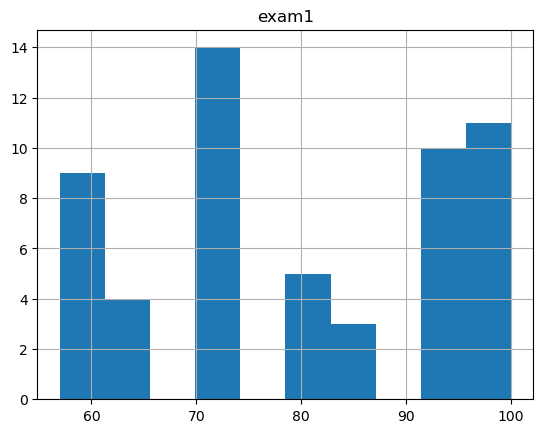

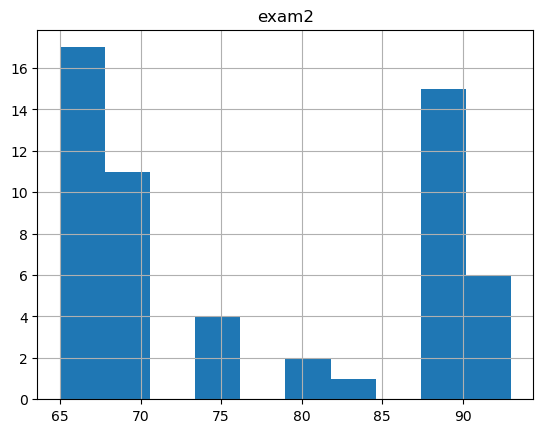

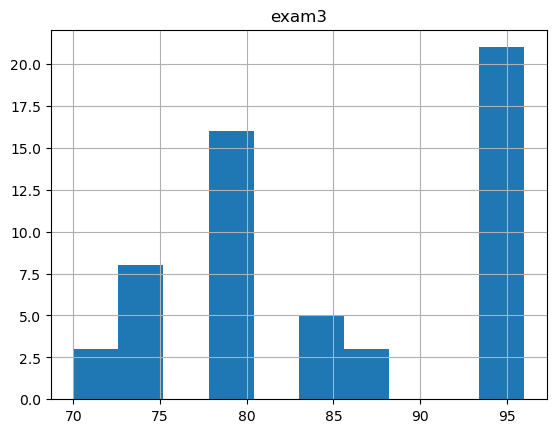

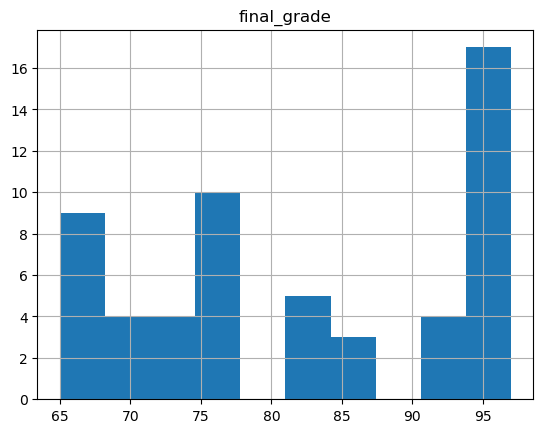

In [49]:
for col in train:
    train[col].hist()
    plt.title(col)
    plt.show()

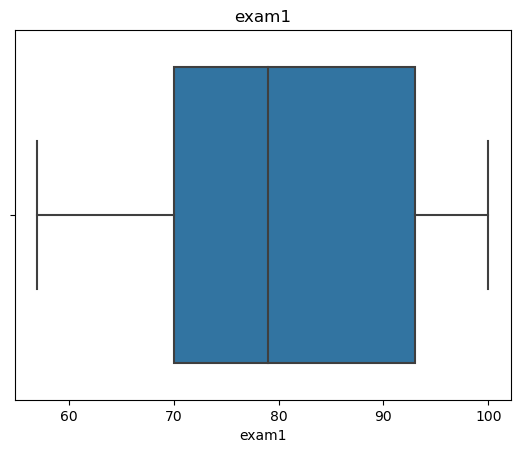

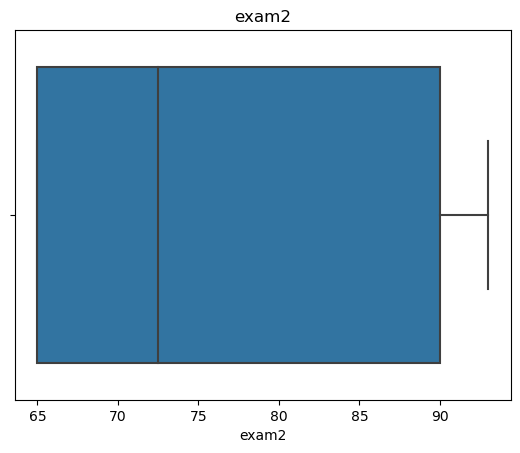

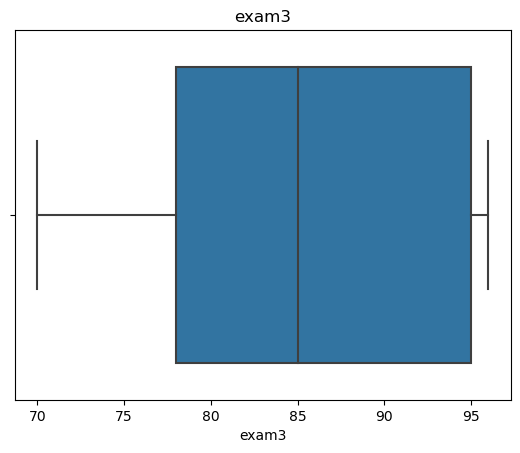

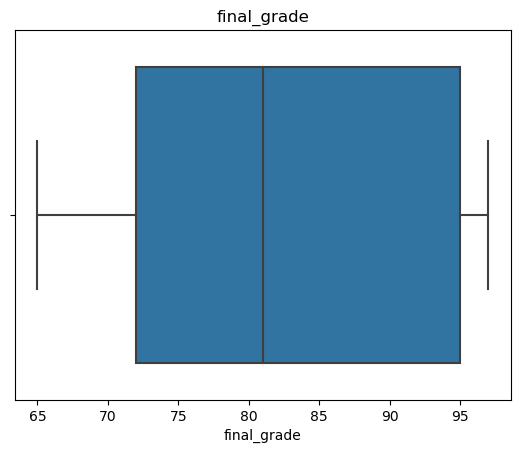

In [52]:
for col in train:
    sns.boxplot(data=train, x=col)
    plt.title(col)
    plt.show()

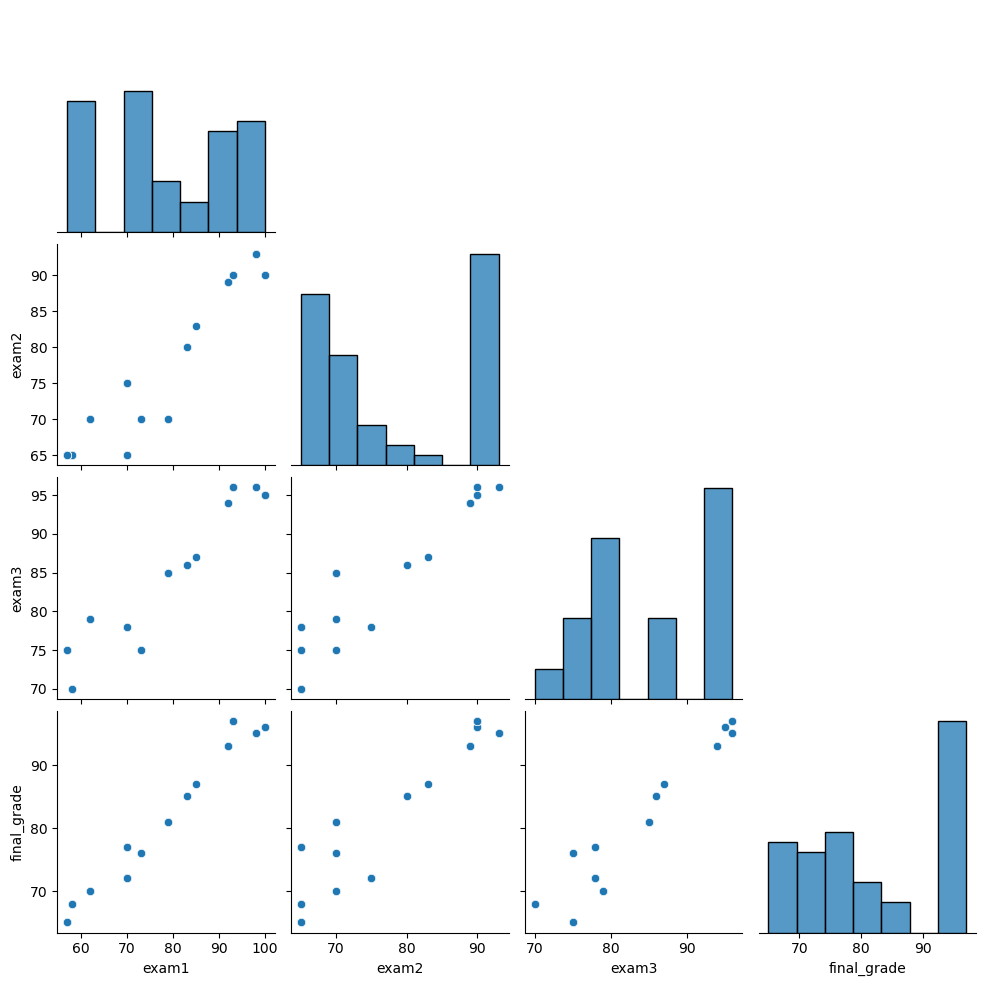

In [55]:
sns.pairplot(train,corner=True)
plt.show()